In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split

columns = [
    'wifi_01',
    'wifi_02',
    'wifi_03',
    'wifi_04',
    'wifi_05',
    'wifi_06',
    'wifi_07',
    'room'
    ]

def redData(path):
    # read selected data
    data = pd.read_csv(path,usecols=columns)
    
    # convert data to numpy matrix
    cols = data.shape[1]
    xd = data.iloc[:,0:cols-1]
    yd = data.iloc[:,cols-1:cols] 
    x = np.matrix(xd.values)
    y = np.matrix(yd.values)

    return x,y,data

#Importing the dataset
X,y,data = redData('../data/data_clean.csv')

x_train,  x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
print ("X_train.shape",x_train.shape)
print ("Y_train.shape",y_train.shape)
print ("X_test.shape",x_test.shape)
print ("Y_test.shape",y_test.shape)

print(f'm = {x_train.shape[0]}\nn = {x_train.shape[1]}')

svc = svm.SVC(C=0.1, kernel='rbf', gamma=0.1)
svc.fit(x_train, y_train)

# print('Train accuracy = {0}%'.format(np.round(svc.score(x_train, y_train) * 100, 2)))
# print('Test accuracy = {0}%'.format(np.round(svc.score(x_test, y_test) * 100, 2)))


X_train.shape (1600, 7)
Y_train.shape (1600, 1)
X_test.shape (400, 7)
Y_test.shape (400, 1)
m = 1600
n = 7


D:\_Dev\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=0.1, gamma=0.1)

In [3]:
y_pred = svc.predict(x_test)
#Making the Confusion Matrix 
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y_test, y_pred)
print("\ncm =",c_m)


cm = [[ 89   0  11   0]
 [  0  87  11   0]
 [  0   0 108   0]
 [  0   0   1  93]]


The accuracy : 0.9425 

presicion score : 0.9425 

recall score : 0.9425 

f1 score : 0.9425 



D:\_Dev\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1267: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn("Note that pos_label (set to %r) is ignored when "


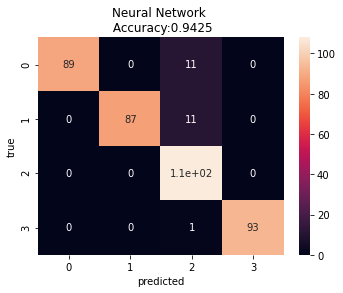

              precision    recall  f1-score   support

       room1       1.00      0.89      0.94       100
       room2       1.00      0.89      0.94        98
       room3       0.82      1.00      0.90       108
       room4       1.00      0.99      0.99        94

    accuracy                           0.94       400
   macro avg       0.96      0.94      0.95       400
weighted avg       0.95      0.94      0.94       400



In [4]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score ,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#-----------------------------------------------------------------------------
a_s= metrics.accuracy_score(y_pred,y_test)
print('The accuracy :',a_s,"\n")
#-----------------------------------------------------------------------------
p_s= precision_score(y_test, y_pred,pos_label='positive',average='micro')
print('presicion score : {}'.format(p_s),"\n")
#-----------------------------------------------------------------------------
r_s=recall_score(y_test, y_pred,pos_label='positive',average='micro')
print('recall score : {}'.format(r_s),"\n")
#-----------------------------------------------------------------------------
f1_s= f1_score(y_test, y_pred ,pos_label='positive',average='micro')
print('f1 score : {}'.format(f1_s),"\n")

df_cm = pd.DataFrame(c_m,  index = [i for i in range(0,4)], columns = [i for i in range(0,4)])
plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('Neural Network \n Accuracy:{}'.format(metrics.accuracy_score(y_test, y_pred)))
plt.ylabel('true')
plt.xlabel('predicted')
plt.show()

print(classification_report(y_test,y_pred,target_names=['room1','room2','room3','room4']))

In [5]:
print("Predection : /n", y_pred.T)
print("Class y : /n",  y_test.T)


Predection : /n [3 1 1 4 1 3 2 1 1 2 4 3 3 2 3 3 3 2 2 4 1 3 1 1 2 1 3 1 4 2 3 2 3 4 4 1 2
 2 4 2 2 1 3 3 4 2 3 2 3 3 3 4 3 1 1 3 3 4 4 4 1 4 3 3 3 3 3 2 2 3 1 3 1 3
 2 1 3 4 1 1 4 3 1 3 4 4 3 1 1 4 1 2 4 1 2 4 4 4 1 3 4 2 1 4 3 3 4 3 3 1 3
 2 1 3 3 4 4 2 2 4 3 2 3 2 1 3 4 2 3 4 1 2 3 4 1 4 1 4 4 4 3 4 2 1 2 2 2 3
 1 2 1 1 1 4 2 3 4 4 3 3 4 1 3 3 2 4 3 2 1 2 4 1 2 3 3 4 4 2 3 2 4 2 1 2 3
 2 4 3 3 3 4 1 2 2 4 3 1 1 2 3 1 4 4 3 4 4 1 1 4 3 2 1 3 1 2 4 1 4 2 1 2 4
 3 2 2 3 2 3 3 2 1 3 4 4 2 3 1 3 3 2 3 2 1 2 3 4 1 2 4 3 2 1 2 4 4 1 2 4 3
 2 3 4 3 3 1 1 3 4 1 3 4 3 3 4 3 3 4 3 2 3 4 1 4 3 2 3 2 2 2 4 3 2 4 3 3 4
 2 3 3 4 3 3 1 3 3 2 1 1 3 3 3 1 2 2 4 4 2 3 3 4 4 3 1 3 2 2 2 4 2 1 2 3 3
 3 2 1 3 3 1 1 4 3 4 3 3 3 3 1 1 3 3 3 1 4 4 3 3 3 1 2 4 2 2 1 3 4 1 3 4 1
 1 4 3 2 2 4 3 2 4 1 1 1 4 3 2 4 1 1 2 1 3 4 3 1 4 3 1 1 1 3]
Class y : /n [[3 1 1 4 1 3 2 1 1 2 4 1 1 2 3 2 3 2 2 4 1 2 1 1 2 1 3 1 4 2 3 2 3 4 4 1
  2 2 4 2 2 1 3 2 4 2 3 2 2 3 3 4 3 1 1 3 3 4 4 4 1 4 2 3 3 3 3 2 2 3 1 3
  1 3 2 1 3